# Aplicação de Survival Analysis no controle de Churn de assinaturas em Telecom

Um dos assuntos mais recorrentes em qualquer tipo de serviço de assinatura é como reduzir o Churn, dado que conquistar novos clientes é bem mais difícil (e caro) do que manter os antigos (https://hbr.org/2014/10/the-value-of-keeping-the-right-customers/). 

Cerca de 70% das empresas sabem que é mais barato manter um cliente do que ter que ir atrás de um novo (http://oursocialtimes.com/70-of-companies-say-its-cheaper-to-retain-a-customer-than-acquire-one/).

Fazendo uma analogia simples, os serviços de assinatura são como uma espécie de sangue na corrente sanguínea de uma empresa e uma interrupção de qualquer natureza prejudica todo o negócio, dado que esse é um modelo de negócio que se baseia na recorrência de tarifação e não no desenvolvimento, ou mesmo venda de outros produtos. 

Modelos de negócoios baseados no volume de pessoas que estão dispostas a terem uma cobrança recorrente o negócio fica bem mais complicado, dado que diferentemente de produtos que tem uma eslasticidade maior o fluxo de receita é extremamente sujeito aos sabores do mercado e dos clientes.

Dentre desse cenário todas as empresas que tem o seu fluxo de receita baseado nesse tipo de business saber quando um cliente entrará em uma situação de saída através do cancelamwnto do serviço (Churn) é fundamental para criar mecanismos de retenção maois efeitvos, ou mesmo criação de réguas de contato com os clientes para evitar ou minimizar a chance de um cliente sair da base de dados. 

Sendo assim, qualquer mecanismo ou mesmo esforço para minimizar esse efeito é de grande valia. E é aí que fomos na teoria estatística buscar respostas para a pergunta: Como diminuir o Churn? Como identificar um potencial cliente que irá entrar em uma situação de Churn? Quais estratégias seguir para minimizar esse Churn? Quais réguas de comunicação com os clientes devemos ter para entender os motivos que estão fazendo um assinante cancelar o serviço e quais são as estratégias de customer Winback possíveis nesse cenário?

E pra responder essa pergunta, fomos buscar as respostas na análise de sobrevivência dado que essa área da estatística é uma das que lidam melhor em termos de probabilidade de tempo de vida seja de materiais (e.g. tempo de falha de algum sistema mecânico), no tempo de vida de pessoas propriamente ditas (e.g. dado uma determinada posologia qual é a estimativa de um paciente sobreviver a um câncer), e no nosso caso quanto tempo de vida um assinante tem até deixar cancelar a sua assinatura. 

A análise de sobreviência é uma técnica estatístisca que foi desenvolvida na medicina e tem como principal finalidade estimar o tempo de sobrevivência ou tempo de morte de um determinado paciente dentro de um horizonte do tempo. 

O estimador de Kaplan-Meier (1958) utiliza uma função de sobrevivência que leva em consideração uma divisão entre o número de observações que não falharam no tempo t pelo número total de observações no estudo em que cada intervalo de tempo tem-se o número de falhas/mortes/churn distintos bem como é calculado o risco de acordo com o número de individuos restantes no tempo subsequente.

Já o estimador Nelson-Aalen (1978) é um estimador que tem as mesmas características do Kaplan-Meier, com a dferença que esse estimador traablha com uma função de sobrevivência que e cumulative hazard rate function

Os elementos fundamentais para caracterização de um estudo que envolve análise de sobrevivência são, o tempo inicial, escala de medida do intervalo de tempo, e se o evento de churn ocorreu

Os principais artigos são de  Artigos Stigler (1994) Kaplan-Meier (1958), Cox (1972).

Esse post não tem como principal objetivo dar algum tipo de introdução à survival analysis, dado que tem muitas referências na internet sobre o assunto e não há nada a ser acrescentado nesse sentido. 

Como a análise de cohort, a análise de sobrevivência tem como principal característica ser um estudo de natureza logituginal, isto é, os seus resultados tem uma caracterisca de temporalidade seja em aspectos de retrospeccao quanto em termos de perspectivas isso é, tem uma resposta tipicamente temporal para um detemrminado evento de interesse. 

No caso o que vamos usar como forma de comparação amostral é o comportamento longituginal de acordo com determinadas caracteristicas de amostragens diferentes ao longo do tempo e os fatores que influenciam no churn

As diferenciações estão claras através das covariáveis, mas que devido a questões de NDA não vamos postar aqui, mas para fins de exemplificação e comparação vamos considerar que todas as covariaveis sao semelhantes

Podemos dizer que a análise de sobrevivência aplicado em um caso de telecom, pode ajudar ter uma estimativa em forma de probabilidade em relação ao tempo em que uma assinatura vai durar até o evento de churn (cancelamento) e dessa forma elaborar estratégias para evitar esse evento, dado que adquirir um novo cliente é mais caro do que manter um novo e entra totalmente dentro de uma estratégia de Customer Winback

No nosso caso o tempo de falha ou tempo de morte, como estamos falando de serviços de assinaturas o nosso evento de interesse seria o churn, ou cancelamento da assinatura. EM outras palavras teríamos algo do tipo Time-to-Churn. Guardem esse termo.  


Metodologia

Usamos dados de dois produtos antigos em que os dados foram anonimizados e aplicados um hash de embaralhamento uniforme (que obedece uma dsitribuição específica) nos atributos por questões de privacidade, em que selecionamos alguns dados que são:

- id = Identificador do registro
- product = produto
- channel = canal no qual o cliente entrou na base de dados
- free_user = flag que indica se o cliente entrou na base em gratuídade ou não
- user_plan = se o usuário é pré-pago ou pós-pago	
- t = tempo que o assinante está na base de dados	
- c = informa se o evento de interesse (no caso o churn (cancelamento da assinatura) ocorreu ou não



Eliminamos o efeito de censura à esquerda eliminando casos de reativações, dado que queriamos entender a jornada do assinante como um todo sem nenhum tipo de viés relativo a questões de customer winback. Em relação à censura à direita temos que esses dados já se passaram alguns meses desde o que essa base foi extraída.

Um aspecto técnico importante a ser considerado é que esses dois produtos estão em categorias de comparabilidade, dado que sem isso nenhum tipo de caractericaç˜µao seria nula.

No fim dessa implementação teremos uma tabela de vida de cada um desses produtos. 



Primeiramente vamos importar as bibilotecas: Pandas (para manipulação de dados), matplotlib (para a geração de gráficos), e lifelines para aplicação da análise de sobrevivência

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lifelines

Após realizar a importação das bibliotecas, vamos ajustar o tamanho das imagens para uma melhor visualização.

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)

Populating the interactive namespace from numpy and matplotlib


Vamos realizar o upload da nossa base de dados criando um objecto chamado df e usando a classe read_csv do pandas. 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/fclesio/learning-space/master/Datasets/07%20-%20Survival/survival_data.csv')

Vamos checar a nossa base de dados

In [6]:
df.head()

,id,product,channel,free_user,user_plan,t,c
0,3315,B,HH,1,0,22,0
1,2372,A,FF,1,1,16,0
2,1098,B,HH,1,1,22,0
3,2758,B,HH,1,1,4,1
4,2377,A,FF,1,1,29,0


Então como podemos ver temos as 7 variáveis na nossa base de dados.

Na sequência vamos importar a biblioteca do lifeniles, em especial o estimador de KaplanMaier

In [7]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

Após realizar a importação da classe relativa ao estimador de Kaplan Meier no objeto kmf, vamos atribuir as nossas variáveis de tempo (T) e evento de interesse (C)

In [8]:
T = df["t"]

C = df["c"]

O que foi feito anteriormente é que buscamos no dataframe df o array t e atribuímos no objeto T, e buscamos o array da coluna c no dataframe e atribuímos no objeto C. 

Agora vamos chamar o método fit usando esses dois objetos no snippet abaixo.

In [9]:
kmf.fit(T, event_observed=C )

<lifelines.KaplanMeierFitter: fitted with 10000 observations, 6000 censored>

Objeto ajustado, vamos agora ver o gráfico relativo a esse objeto usando o estimador de Kaplan Meier. 

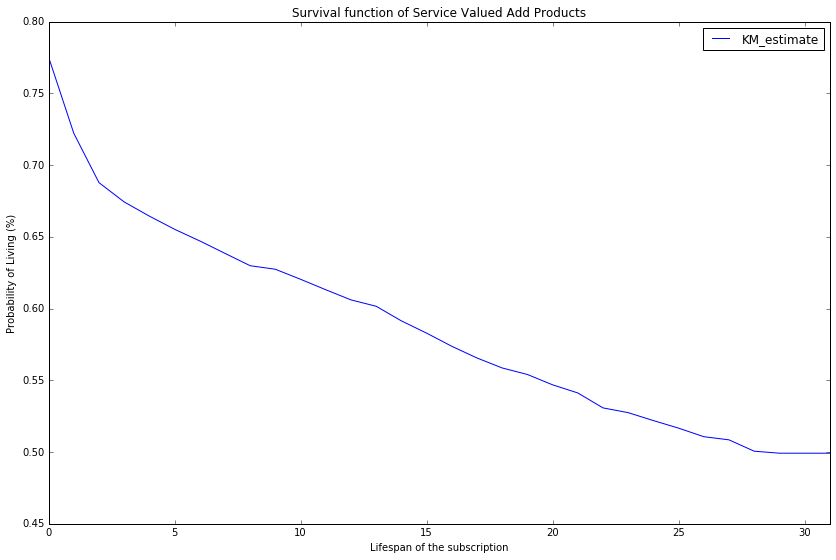

In [10]:
kmf.survival_function_.plot()
plt.title('Survival function of Service Valued Add Products');
plt.ylabel('Probability of Living (%)')
plt.xlabel('Lifespan of the subscription')

Como podemos ver no gráfico, temos algumas observações pertinentes, quando tratamos a probabilidade de sobreviência desses dois produtos no agregado que são:

- Logo no primeiro dia há uma redução substâncial do tempo de sobrevivência da assinatura em aproximadamente 22%;
- Há um decaímento quase que linear depois do quinto dia de assinatura;
- Depois do dia número 30, a probabilidade de sobrevivência de uma assinatura é de aproximadamente de 50%. Em outras palavras: depois de 30 dias, metade dos novos assinantes já estarão fora da base de dados. 

No entando, vamos plotar a mesma função de sobreviência considerando os intervalos de confiança estatística (http://www.portalaction.com.br/inferencia/intervalo-de-confianca).



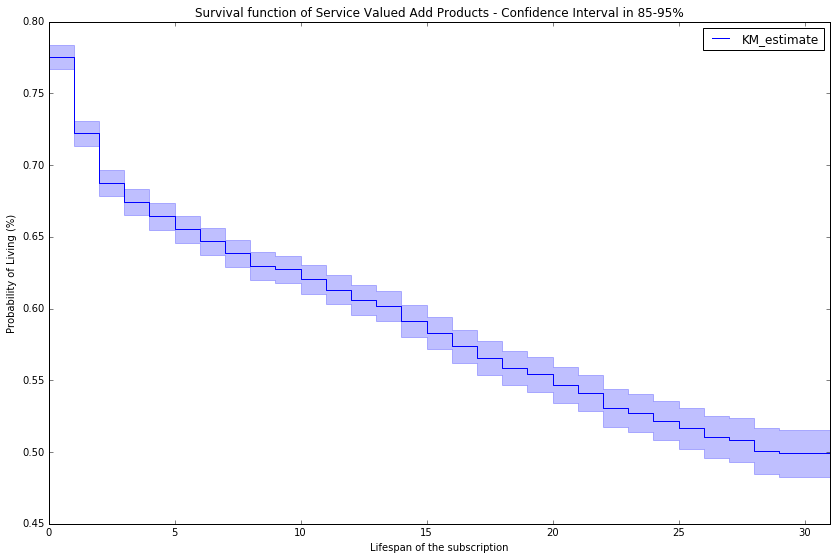

In [11]:
kmf.plot()
plt.title('Survival function of Service Valued Add Products - Confidence Interval in 85-95%');
plt.ylabel('Probability of Living (%)')
plt.xlabel('Lifespan of the subscription')

Contudo nesse modelo inicial temos duas limitações claras que são:
- Os dados no agregado não dizem muito em relação à dinâmicas que podem estar na especificidade de alguns atributos/dimensões
- Não é exploradas as dimensões (ou quebras) de acordo com os atributos que vieram na base de dados
- Não há a divisão por produto

Para isso, vamos começar a fazer um drill-down em relação a cada uma das dimensões e ver o que cada uma tem de influência em relação à função de sobrevivência. 

Vamos começar realizando a quebra por tipo de plano (user_plan) em que temos usuários pré-pagos com usuários pós-pagos e essa divisão será feita por produto.

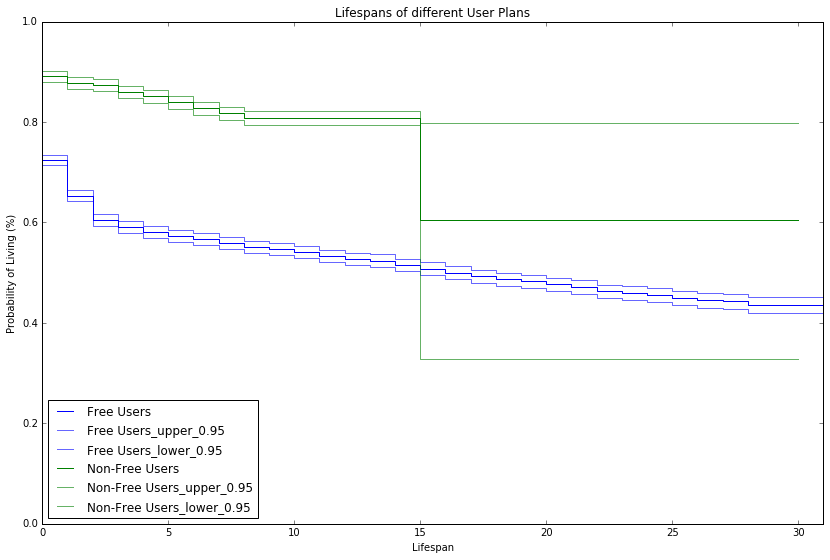

In [12]:
ax = plt.subplot(111)

free = (df["free_user"] == 1)
kmf.fit(T[free], event_observed=C[free], label="Free Users")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[~free], event_observed=C[~free], label="Non-Free Users")
kmf.plot(ax=ax, ci_force_lines=True)
plt.ylim(0,1);
plt.title("Lifespans of different User Plans");
plt.ylabel('Probability of Living (%)')
plt.xlabel('Lifespan')


Este gráfico apresenta algumas informações importantes para os primeiros insights em relação a cada uma das curvas de sobreviência em relação ao tipo de gratuídade oferecida como fator de influência para o churn que são:
- Os assinantes que entram como não gratuítos (i.e. não tem nenhum tipo de degustação inicial) após o 15o dia apresenta um decaímento brutal de mais de 40% da chance de sobreviência (tratando-se do intervalo de confiança);
- Após o 15o dia os assinantes que não desfrutam de degustação tem a sua curva de sobrevivência em uma relativa estabilidade em torno de 60% na probabilidade de sobrevivência até o período censurado;
- Ainda nos usuários sem degustação, dado o grau de variabilidade do intervalo de confiança podemos tirar como conclusão que muitos cancelamentos estão ocorrendo de forma muito acelerada, o que deve ser investigado com mais calma pelo time de produtos;
- Já oos usuários que entram via degustação (i.e. ganham alguns dias grátis antes de serem tarifados) apresenta um nível de decaímento do nível de sobreviência maior seja no período incial, quando ao longo do tempo, contudo uma estabilidade é encontrada ao longo de toda a série sem maiores sobressaltos.

Dado essa análise incial das curvas de sobreviência, vamos avaliar agora as probabilidades de sobrevivência de acordo com o produto. 

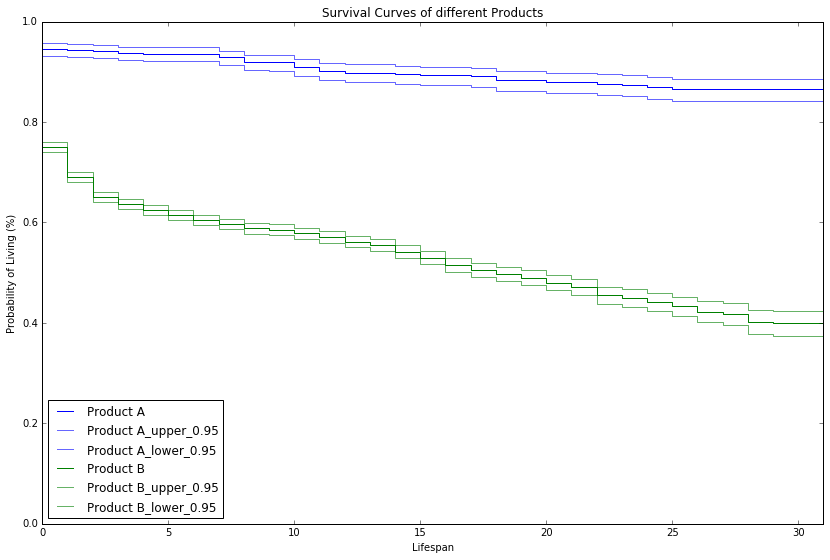

In [13]:
ax = plt.subplot(111)

product = (df["product"] == "A")
kmf.fit(T[product], event_observed=C[product], label="Product A")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[~product], event_observed=C[~product], label="Product B")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0,1);
plt.title("Survival Curves of different Products");
plt.ylabel('Probability of Living (%)')
plt.xlabel('Lifespan')

Este gráfico apresenta a primeira distinção entre os dois produtos de uma forma mais clara. 

Mesmo com os intervalos de confiança com uma variação de 5%, podemos ver que o produto A (linha azul) tem uma maior probabilidade de sobrevivência com uma diferença percentual de mais de 15%; diferença essa amplificada depois do vigésimo dia. 

Em outras palavras: Dado um determinada safra de usuários, caso o usuário entre no produto A o mesmo tem uma probabilidade de retenção de cerca de 15% em relação a um usuário que por ventura entre no produto B, ou o produto A apresenta uma cauda de retenção superior ao produto B. 

Empiricamente é sabido que um dos principais fatores de influência de produtos SVA são os canais de mídia os quais esses produtos são oferecidos. 

O canal de mídia é o termômetro em que podemos saber se estamos oferencendo os nossos produtos para o público alvo correto. 

No entanto para um melhor entendimento, vamos analisar os canais nos quais as assinaturas são originadas. 

A priori vamos normalizar a variável _channel_ para realizar a segmentação dos canais de acordo com o conjunto de dados.


In [14]:
df['channel'] = df['channel'].astype('category');
channels = df['channel'].unique()

Após normalização e transformação da variável para o tipo categórico, vamos ver como está o array.

In [15]:
channels

[HH, FF, CC, AA, GG, ..., BB, EE, DD, JJ, ZZ]
Length: 11
Categories (11, object): [HH, FF, CC, AA, ..., EE, DD, JJ, ZZ]

Aqui temos a representação de 11 canais de mídia os quais os clientes entraram no serviço. 

Com esses canais, vamos identificar a probabilidade de sobrevivência de acordo com o canal.

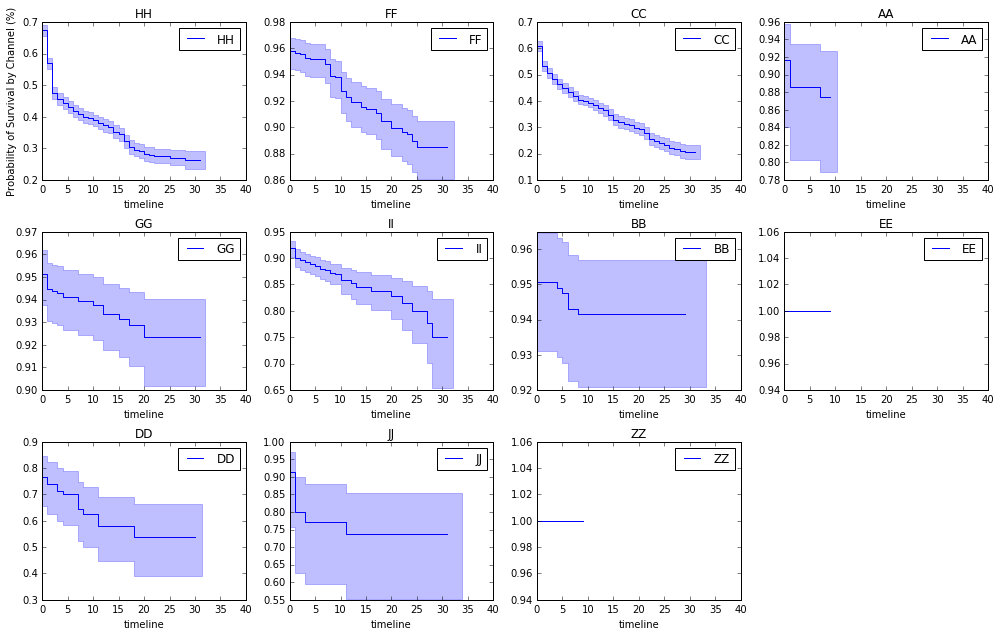

In [18]:
for i,channel_type in enumerate(channels):
    ax = plt.subplot(3,4,i+1)
    ix = df['channel'] == channel_type
    kmf.fit( T[ix], C[ix], label=channel_type )
    kmf.plot(ax=ax, legend=True)
    plt.title(channel_type)
    plt.xlim(0,40)
    if i==0:
        plt.ylabel('Probability of Survival by Channel (%)')
plt.tight_layout()